In [38]:
#libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather Data

In [39]:
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time

twitter_arch = pd.read_csv("twitter-archive-enhanced.csv")



image = ('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/'
                         '599fd2ad_image-predictions/image-predictions.tsv')

df_image = pd.read_csv(image, delimiter='\t')

consumer_key = 'qDpfgsuwGVNFTDuyATrpPuyHc'
consumer_secret = 'bCcsPltBRNSDz2R1SNHLSvCKy8duxsiZl6hxEhs1umGd9ItOPJ'
access_token = '609395742-caU9k5CCiaqx6Ix1opDMxZ3Iuu96NoMOf6OWhdhE'
access_secret = 'fj3YjAzxz2bFIZmzvSAulR5n3KfO2kyIaitoyrHxu1far'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)


tweet_ids = list(twitter_arch.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))
        

with open('tweet_API.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)
    
tweet_API = pd.read_json('tweet_API.txt',orient='index')

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968
Rate limit reached. Sleeping for: 738
Error for: 754011816964026368
Error for: 680055455951884288
Rate limit reached. Sleeping for: 738


# Asess Data  

In [40]:
#twitter_arch.head()
twitter_arch.info()
twitter_arch.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [41]:
#df_image.head()
df_image.info()
df_image.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [42]:
#tweet_API.head()
tweet_API.info()
tweet_API.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2340.000000,2340.0,0.0,2.340000e+03,2.340000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2340.000000,2205.0,2205.0,2.600000e+01,2.600000e+01,2340.000000,2340.0,2340.000000
mean,NaN,NaN,7949.566667,0.0,NaN,7.422176e+17,7.422176e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.013248,0.0,0.0,8.113972e+17,8.113972e+17,2922.885470,0.0,0.105556
std,NaN,NaN,12313.016686,0.0,NaN,6.832564e+16,6.832564e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.114359,0.0,0.0,6.295843e+16,6.295843e+16,4924.211555,0.0,0.307334
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,0.000000,0.0,0.000000
25%,NaN,NaN,1371.500000,0.0,NaN,6.783394e+17,6.783394e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.000000,0.0,0.0,7.761338e+17,7.761338e+17,586.750000,0.0,0.000000
50%,NaN,NaN,3455.000000,0.0,NaN,7.186224e+17,7.186224e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.281173e+17,8.281173e+17,1364.500000,0.0,0.000000
75%,NaN,NaN,9726.500000,0.0,NaN,7.986954e+17,7.986954e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3406.000000,0.0,0.000000
max,NaN,NaN,164006.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,83455.000000,0.0,1.000000


# Clean Data

Quality & Tidines issues 

Twitter arch : 
some entries contins tweet that is a retweet ( not the orginal tweet ) 
missing entries in expanded_urls
unused coulms in analysis process
Date and Time columns should be datetime objects
Rating columns is more conviense to have a float value  

Image df : 
p1 capitalization problem 
p2 capitalization problem 
p3 capitalization problem 
remove (_)between words 

tweet_API : 
change the name of the id column to "tweet_id" 
change coulms order to be more conviense and easy 




In [43]:
#Make new dataframes for clean data 

twitter_arch_clean = twitter_arch.copy()
df_image_clean = df_image.copy()
tweet_API_clean=tweet_API.copy()


In [44]:
#clean Twitter arch 

#remove retweets entries by using matching text pattern 'RT @...'

retweets = twitter_arch_clean.text.str.match('^RT @')
twitter_arch_clean = twitter_arch_clean[~retweets]

#missing entries in expanded_urls

def expanded_urls(row):
    if pd.notnull(row['expanded_urls']):
        return row
    else:

        tweet_id = row['tweet_id']
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row


twitter_arch_clean = twitter_arch_clean.apply(expanded_urls, axis=1)


#change Date and Time data type using panda 

twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'])

#create new coulms 
twitter_arch_clean['date'] = twitter_arch_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_arch_clean['time'] = twitter_arch_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))


#change rating coulmn type to float 

twitter_arch_clean['rating_numerator'] = twitter_arch_clean['rating_numerator'].astype(float)
twitter_arch_clean['rating_denominator'] = twitter_arch_clean['rating_denominator'].astype(float)



In [8]:
#Test twitter_arch_clean

twitter_arch_clean.info()
twitter_arch_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
date                     

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,07-29-2017,16:00


In [45]:
#clean Image 

#capatilaization problem 

df_image_clean['p1'] = df_image_clean['p1'].str.capitalize()
df_image_clean['p2'] = df_image_clean['p2'].str.capitalize()
df_image_clean['p3'] = df_image_clean['p3'].str.capitalize()

# remove (_) from words 

df_image_clean['p1'] = df_image_clean['p1'].str.replace('_', ' ')
df_image_clean['p2'] = df_image_clean['p2'].str.replace('_', ' ')
df_image_clean['p3'] = df_image_clean['p3'].str.replace('_', ' ')



In [46]:
#Test Image 
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
#Clean twitter_Api 

tweet_API_clean.rename(columns={'id': 'tweet_id'}, inplace=True)



In [49]:
#test twitter_API

tweet_API_clean.head()


,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,tweet_id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2532,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,500,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,126,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,123,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,293,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,106,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,42,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [52]:
#convert the id type for merging 
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(str)
df_image_clean.tweet_id = df_image_clean.tweet_id.astype(str)
tweet_API_clean.tweet_id = tweet_API_clean.tweet_id.astype(str)



In [53]:
#Use an inner join to combine the datasets together into a single dataframe


finalData = pd.merge(twitter_arch_clean, tweet_API_clean,on='tweet_id', how='inner')
finalData=pd.merge(df_image_clean, finalData ,on='tweet_id', how='inner')
#store our data 
finalData.to_csv('twitter_archive_master.csv')

#Test
finalData.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,text_y,truncated,user
0,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
2,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box turtle,0.933012,False,Mud turtle,0.045885,False,Terrapin,...,NaN,NaN,NaN,834,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,0,"{'contributors_enabled': False, 'created_at': ..."
3,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping basket,0.014594,False,Golden retriever,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,0,"{'contributors_enabled': False, 'created_at': ..."
4,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Komondor,0.192305,True,Soft-coated wheaten terrier,...,NaN,NaN,NaN,57,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,0,"{'contributors_enabled': False, 'created_at': ..."


# Analyze

I will investigate the following : 

relation between faviorate and retweet 
lowest rated dogs
rating over time  



In [54]:
# Descriptive analysis 

twitter_master = pd.read_csv("twitter_archive_master.csv")
twitter_master.describe()

,Unnamed: 0,tweet_id,img_num,p1_conf,p2_conf,p3_conf,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,...,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,truncated
count,1298.000000,1.298000e+03,1298.000000,1298.000000,1.298000e+03,1.298000e+03,1.500000e+01,1.500000e+01,0.0,0.0,...,1298.0,1298.0,1298.0,0.0,0.0,0.0,1298.000000,1298.0,0.0,1298.000000
mean,648.500000,7.327419e+17,1.187211,0.586720,1.371536e-01,6.149405e-02,7.002882e+17,4.196984e+09,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,2455.969954,0.0,NaN,0.108629
std,374.844634,6.633735e+16,0.540929,0.273508,1.018387e-01,5.202003e-02,5.013317e+16,0.000000e+00,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,3973.671764,0.0,NaN,0.311293
min,0.000000,6.660293e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,6.671522e+17,4.196984e+09,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,11.000000,0.0,NaN,0.000000
25%,324.250000,6.748540e+17,1.000000,0.354689,5.443702e-02,1.651733e-02,6.732617e+17,4.196984e+09,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,562.500000,0.0,NaN,0.000000
50%,648.500000,7.062785e+17,1.000000,0.576936,1.203825e-01,4.961540e-02,6.757073e+17,4.196984e+09,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,1225.500000,0.0,NaN,0.000000
75%,972.750000,7.792808e+17,1.000000,0.836617,1.983982e-01,9.471785e-02,7.031489e+17,4.196984e+09,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,2904.750000,0.0,NaN,0.000000
max,1297.000000,8.918152e+17,4.000000,1.000000,4.676780e-01,2.710420e-01,8.558181e+17,4.196984e+09,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,60858.000000,0.0,NaN,1.000000


In [ ]:
#Relation between faviorate and retweets 

In [56]:
#lowest rated dog 
twitter_master[twitter_master['rating_numerator']==1]

,Unnamed: 0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,text_y,truncated,user
9,9,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Hen,0.965932,False,Cock,0.033919,False,...,NaN,NaN,NaN,6415,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,0,"{'contributors_enabled': False, 'created_at': ..."
12,12,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese dog,0.857531,True,Toy poodle,0.063064,True,...,NaN,NaN,NaN,64,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,0,"{'contributors_enabled': False, 'created_at': ..."
64,64,667549055577362432,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Electric fan,0.984377,False,Spotlight,0.007737,False,...,NaN,NaN,NaN,2320,0,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,0,"{'contributors_enabled': False, 'created_at': ..."
333,333,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,Paper towel,0.327957,False,Mailbox,0.096027,False,...,NaN,NaN,NaN,2729,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,0,"{'contributors_enabled': False, 'created_at': ..."


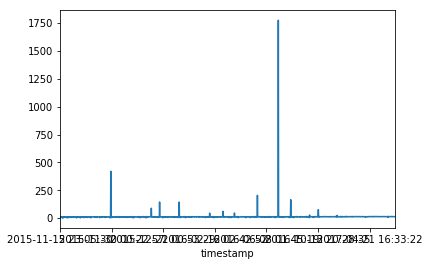

In [57]:
#rating avarage over time 


twitter_master.groupby('timestamp')['rating_numerator'].mean().plot()




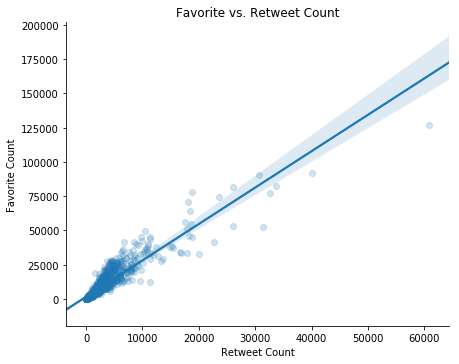

In [59]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_master,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');